In [88]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import interp1d
from scipy import fftpack
from matplotlib.colors import LogNorm

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

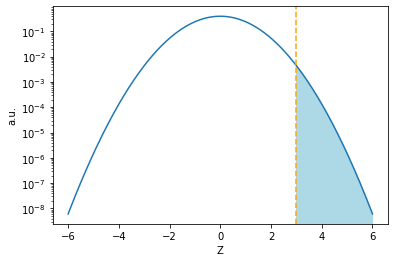

alpha = 0.0013


In [30]:
# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
Z = 3
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=xs > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.ylabel("a.u.")
plt.xlabel("Z")
plt.yscale("log")
plt.show()

# calculate the p-value the right tail hence we are interested in a one side test
pvalue = (1. - stats.norm.cdf(Z))
print("alpha = %5.4f"%(pvalue))

Assuming as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution means that we are setting a significance level alpha at 0.0013

The probability of observing (inclusive) more than 15 hurricanes in a single year is 0.0022


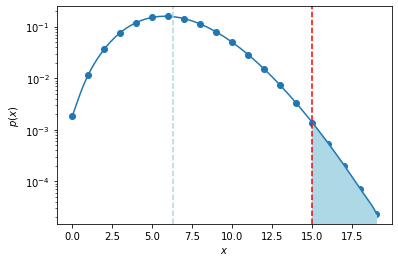

In [31]:
mu = 6.3
x0 = 15

def poisson(l, k):
    return l**k * np.exp(-l) / np.math.factorial(k)

# compute the probability that in a single year are obsereved 15 or more hurricanes
prob_less_x0 = np.sum([poisson(mu, i) for i in range(x0)])
prob_more_x0 = 1- prob_less_x0
print("The probability of observing (inclusive) more than 15 hurricanes in a single year is %5.4f"%(prob_more_x0))

"""
# determine the Z score
Z = abs(x0 - mu) / np.sqrt(mu)
print("Z =", Z)
"""

# plot the measurement and its assumed pdf
w = np.abs(mu - x0)
#print(w)
x = range(20)
y = [poisson(mu, xi) for xi in x]
plt.scatter(x, y)

f = interp1d(x, y, kind='cubic')
x_ = np.linspace(0, 19, 1000)
#print(x_)
plt.plot(x_, f(x_))

plt.fill_between(x_, f(x_), where=(x_ - mu > w), color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale('log')
plt.show()

Hence, yes, observing 15 hurricanes in 2005 was significantly different from average. Indeed, the probability of observing 15 or more hurricanes in a single year given the assumptions is higher than the set treshold for a statistically significant probability.
$$ p_{\ge 15} = 0.0022 > \alpha = 0.0013 $$

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

$H_0$ = _change in blood pressures was not statistically significant_

$H_1$ = _change in blood pressures was statistically significant_

$\alpha = 0.05$

-3.991846326292112


(1e-06, 1)

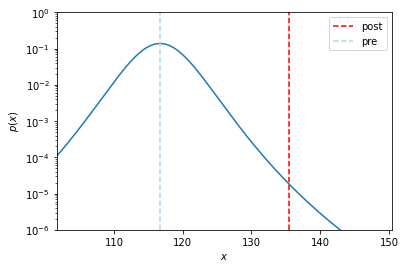

In [23]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma = np.sqrt((pre.std()**2 + post.std()**2)/2)
T     = (pre.mean() - post.mean())/(sigma*np.sqrt(2/len(pre)))
print(T)

# plot the t-student distribution
mu  = pre.mean()
mu_ = post.mean()
x = np.linspace(mu - mu_-5, mu_ + mu+5, 1000)
y = stats.t.pdf(x, loc=pre.mean(), scale=pre.std() / np.sqrt(len(pre)), df=len(pre) - 1)
plt.plot(x, y)
plt.axvline(mu_, linestyle='--', color='red', label='post')
plt.axvline(mu, linestyle='--', color='lightblue', label='pre')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")
plt.legend()
plt.xlim([mu-15, mu_+15])
plt.ylim([1e-6, 1])

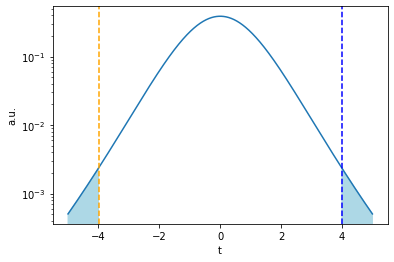

p-value = 0.0031


In [33]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.yscale("log")


plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))
print("p-value = %5.4f"%(pvalue))

We found $p_{value} = 0.0031 < \alpha $ so we reject the null hypotesis.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

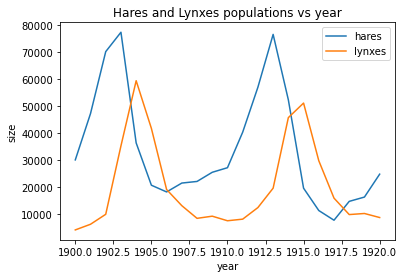

In [44]:
populations = np.loadtxt('populations.txt')

year    = populations[:,0]
hares   = populations[:,1]
lynxes  = populations[:,2]
#carrots = populations[:,3]

# plot the 2 populations over the years
plt.plot(year, hares, label = "hares")
plt.plot(year, lynxes, label = "lynxes")
#plt.plot(year, carrots, label = "carrots")
plt.xlabel("year")
plt.ylabel("size")
plt.title("Hares and Lynxes populations vs year")
plt.legend()
plt.show()

Hares  peak frequency: 0.0952
Lynxes peak frequency: 0.0952


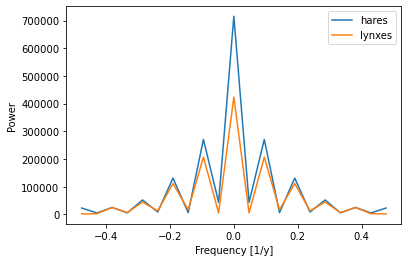

In [78]:
# compute FFT of the two populations
hares_fft  = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)

# compute the powers
hares_fft_pow  = np.abs(hares_fft)
lynxes_fft_pow = np.abs(lynxes_fft)

# return corresponding frequencies 
freqs  = fftpack.fftfreq(len(year), d=1)

idx = np.argsort(freqs)
#freqs = freqs[idx]
#hares_fft_pow  = hares_fft_pow[idx]
#lynxes_fft_pow = lynxes_fft_pow[idx]

# plot
plt.plot(freqs[idx], hares_fft_pow[idx], label="hares")
plt.plot(freqs[idx], lynxes_fft_pow[idx], label="lynxes")
plt.xlabel('frequency [1/y]')
plt.ylabel('power')
plt.legend()

# find the max peaks and respective freqs
pos_mask = np.where(freqs > 0)
hares_peak_freq  = freqs[pos_mask][hares_fft_pow[pos_mask].argmax()]
lynxes_peak_freq = freqs[pos_mask][lynxes_fft_pow[pos_mask].argmax()]

print("Hares  peak frequency: %5.4f"%(hares_peak_freq))
print("Lynxes peak frequency: %5.4f"%(lynxes_peak_freq))

So, we observe that the two popultations have the same peak frequency -> period. Now we can remove the noise and return the true periodic behaviour of the two populations:

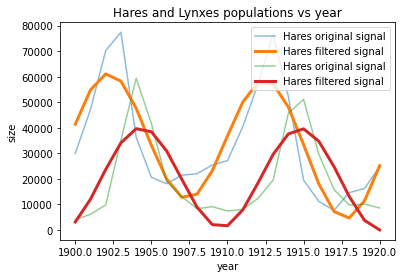

In [82]:
# filter (set to zero) all high frequency components that are larger than peak_freq
hares_hig_freqs, lynxes_hig_freqs = hares_fft.copy(), lynxes_fft.copy()

hares_hig_freqs[np.abs(freqs)>hares_peak_freq]   = 0
lynxes_hig_freqs[np.abs(freqs)>lynxes_peak_freq] = 0

# calculate the Inverse Fast Fourier Transform
filtered_hares = np.real(fftpack.ifft(hares_hig_freqs))
filtered_lynxes = np.real(fftpack.ifft(lynxes_hig_freqs))


# plot the result of the IFFT
plt.plot(year, hares, alpha=0.5, label='Hares original signal')
plt.plot(year, filtered_hares, linewidth=3, label='Hares filtered signal')
plt.plot(year, lynxes, alpha=0.5, label='Hares original signal')
plt.plot(year, filtered_lynxes, linewidth=3, label='Hares filtered signal')
plt.xlabel('year')
plt.ylabel('size')
plt.title("Hares and Lynxes populations vs year")
plt.legend()


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

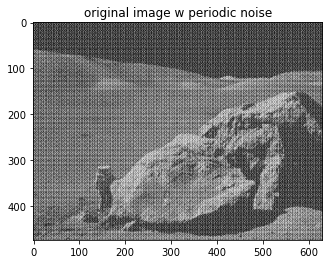

In [85]:
# Import the image as a 2D numpy array
image = plt.imread("moonlanding.png")
plt.imshow(image, cmap='gray')
plt.title("original image w periodic noise")
plt.show()

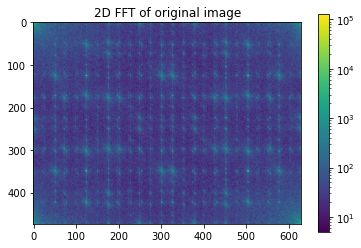

In [111]:
# Perform a 2D FFT
image_fft = fftpack.fft2(image)
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5, vmax=np.abs(image_fft).max()))
plt.title("2D FFT of original image")
plt.colorbar()
plt.show()

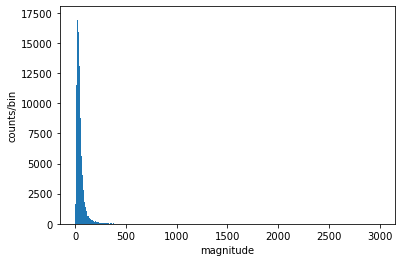

In [121]:
# Inspect the spectrum, and try to locate the regions of the power spectrum 
# that contain the signal and those which contain the periodic noise

magnitudes = np.reshape(np.abs(image_fft), (np.prod(image_fft.shape)))
plt.hist(magnitudes, bins=1000, range=[0,3000])
plt.xlabel("magnitude")
plt.ylabel("counts/bin")
plt.show()

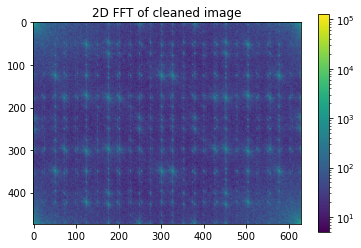

In [122]:
# I try to cancel out higher magnitude regions
filtered_image_fft = image_fft.copy()
filtered_image_fft[np.abs(image_fft)>3000]=0
plt.imshow(np.abs(filtered_image_fft), norm=LogNorm(vmin=5, vmax=np.abs(image_fft).max()))
plt.title("2D FFT of cleaned image")
plt.colorbar()
plt.show()

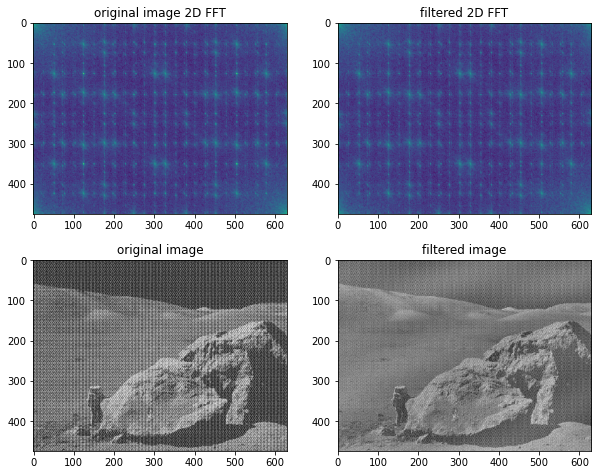

In [125]:
# Apply the inverse Fourier transform to plot the resulting image
filtered_image = np.real(fftpack.ifft2(filtered_image_fft))

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].imshow(np.abs(image_fft), norm=LogNorm(vmin=5, vmax=np.abs(image_fft).max()))
ax[0, 0].set_title("original image 2D FFT")
ax[0, 1].imshow(np.abs(filtered_image_fft), norm=LogNorm(vmin=5, vmax=np.abs(image_fft).max()))
ax[0, 1].set_title("filtered 2D FFT")
ax[1, 0].imshow(image, cmap='gray')
ax[1, 0].set_title("original image")
ax[1, 1].imshow(filtered_image, cmap='gray')
ax[1, 1].set_title("filtered image")
plt.show()